# Project 2: Spam/Ham Prediction

In this project, you will use what you've learned in class to create a classifier that can distinguish spam emails from ham (non-spam) emails.

We'll walk you through a couple steps to get you started, but this project is almost entirely open-ended. Instead of providing you with a skeleton to fill in, we will evaluate your work based on your model's accuracy and your written responses in this notebook.

## Kaggle

This project is a bit different from the other assignments in this class because we are using Kaggle to evaluate your model's accuracy. Kaggle is a website that hosts machine learning competitions.

We've created a competition just for this project: https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

Here's how submitting to Kaggle works:

1. You will create a classifier using the training dataset.
2. You will use your classifier to make predictions on the test dataset.
3. You will upload your predictions as a CSV to https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3
4. The website will tell you your accuracy on the test set. You may only do this twice a day. You must reach a test set accuracy of **88%** in order to get full credit for the Kaggle portion of the assignment.

(After the assignment ends, we will evaluate your accuracy on a private test set to ensure that you aren't overfitting to the test set.)

## Submission

This project has no ok tests (and no autograder). Instead, you will submit the following:

0. **Your notebook to OkPy**. You can do this by running the `ok.submit()` cell at the bottom of this notebook. Note that there is no autograder for this assignment so you will not receive autograder emails.
0. **Your notebook's written answers to GradeScope.** The cell to export the notebook is located at the bottom of this notebook. If you have trouble converting your notebook to PDF, you may upload your notebook to http://datahub.berkeley.edu/ and run the cell there.
0. **Your model's predictions on the test set to Kaggle**, a website that hosts machine learning competitions. Kaggle will output your your accuracy on the test set so that you will know whether you've met the accuracy threshold or not.

**To prevent you from fitting to the test set, you may only upload predictions to Kaggle twice per day.** This means you should start early. In addition, if you decide to pair with someone else, your group only gets two submissions per day (not four).

This project (notebook + Gradescope submissions) is officially due Friday, Dec 1 at 11:59:59pm since we can't make assignments due after classes end. However, we will accept submissions until **Monday, Dec 4 at 11:59:59pm** without using slip days. Submissions after Dec 4 will use 1 slip day each day after Dec 4. The Kaggle competition will remain open until **Saturday Dec 9 at 11:59:59pm**.

**No late Kaggle submissions will be accepted** since we've taken slip days into account when setting the Kaggle deadline. You will not use slip days for Kaggle submissions.

## Grading
Grading will be based on a number of set criteria, enumerated below:

Task | Description
--- | ---
Basic Classifier | You succesfully implement our guided basic logistic regression classifier.
EDA | You create four exploratory plots that help explain your feature choices.
Feature Selection | You explain and justify your feature selection process
Written Questions | You answer the written questions that we place throughout this notebook.
Kaggle Accuracy | Your model beats the prediction accuracy threshold of **88%**. This is attainable with a well-thought-out model.

**You are allowed to work in groups of 2 for this assignment!** If you decide to partner with someone else, make sure you do the following:

1. Have one person in the group invite the other on OkPy: https://okpy.org/cal/ds100/fa17/proj2/
1. Have one person in the group invite the other person on Gradescope.
1. Have one person in the group invite the other person on Kaggle: https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

## Prizes

Although you need to reach 88% accuracy in order to get full credit, we will reward those that create great classifiers.

The top 10 students on the Kaggle leaderboard, evaluated by their score in the private test set will: 

1. Have bragging rights 
2. Be invited to attend a lunch at the Faculty Club, hosted by Professors Gonzalez and Nolan.

## Restrictions

While we want you to be creative with your models, we want to make it fair to students who are seeing these techniques for the first time.  As such, **you are only allowed to train logistic regression models and their regularized forms**.  This means no random forest, CART, neural nets, etc.  However, you are free to feature engineer to your heart's content.  Remember that domain knowledge is the third component of data science.

## Getting Started

In [3]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown, HTML, Javascript
# from client.api.notebook import Notebook
# ok = Notebook('proj2.ok')

For your convenience, run this cell to highlight the written response cells in light blue. Only the highlighted cells will be converted to the GradeScope PDF, so put your written answers there.

Unfortunately, you'll have to run this each time you open your notebook to highlight cells.

In [4]:
highlight_cells = '''
Jupyter.notebook.get_cells().map(function(cell) {
  var tags = cell.metadata.tags
  if (tags && tags.indexOf('written') >= 0)
    cell.element.css('background-color', '#efefff')
})
'''
display(Javascript(highlight_cells))

<IPython.core.display.Javascript object>

## Loading in the Data

The dataset consists of email messages and their labels (0 for ham, 1 for spam). The training set contains 8348 labeled examples, and the test set contains 1000 unlabeled examples.

Run the following cells to load in the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains three columns:

1. `id`: An identifier for the training example.
1. `subject`: The subject of the email
1. `email`: The text of the email.
1. `spam`: 1 if the email was spam, 0 if the email was ham (not spam).

The `test` DataFrame contains another set of 1000 unlabeled examples. You will predict labels for these examples and submit your predictions to Kaggle for evaluation.

In [5]:
train = pd.read_csv('train.csv')
# We lower case the emails to make them easier to work with
train['email'] = train['email'].str.lower()
train

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0
5,5,Subject: Five\n,url: http://diveintomark.org/archives/2002/10/...,0
6,6,Subject: [SAdev] [Bug 1006] Spamassassin's bui...,http://www.hughes-family.org/bugzilla/show_bug...,0
7,7,Subject: One of a kind Money maker! Try it for...,------000000000000000000000\n content-type: te...,1
8,8,Subject: freshrpms.net resources (was Re: use ...,"once upon a time, brian wrote :\n \n > yeah...",0
9,9,Subject: use of base image / delta image for a...,"hi,\n \n i was inspired by a mode of operation...",0


In [6]:
train_upper= pd.read_csv('train.csv')
train_upper.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,URL: http://boingboing.net/#85534171\n Date: N...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",URL: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<HTML>\n <HEAD>\n </HEAD>\n <BODY>\n <FONT SIZ...,1
3,3,Subject: liberal defnitions\n,Depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


In [7]:
test = pd.read_csv('test.csv')
test['email'] = test['email'].str.lower()
test.head()

,id,subject,email
0,0,Subject: CERT Advisory CA-2002-21 Vulnerabilit...,\n \n -----begin pgp signed message-----\n \n ...
1,1,Subject: ADV: Affordable Life Insurance ddbfk\n,low-cost term-life insurance!\n save up to 70%...
2,2,Subject: CAREER OPPORTUNITY. WORK FROM HOME\n,------=_nextpart_000_00a0_03e30a1a.b1804b54\n ...
3,3,Subject: Marriage makes both sexes happy\n,"url: http://www.newsisfree.com/click/-3,848315..."
4,4,Subject: Re: [SAtalk] SA very slow (hangs?) on...,on thursday 29 august 2002 16:39 cet mike burg...


### Question 1

In the cell below, print the text of the first ham and the first spam email in the training set. Then, discuss one thing you notice that is different between the two.

In [8]:
train['email'][0]

'url: http://boingboing.net/#85534171\n date: not supplied\n \n arts and letters daily, a wonderful and dense blog, has folded up its tent due \n to the bankruptcy of its parent company. a&l daily will be auctioned off by the \n receivers. link[1] discuss[2] (_thanks, misha!_)\n \n [1] http://www.aldaily.com/\n [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf\n \n \n'

In [9]:
# Print the text of the first ham and the first spam emails. Then, fill in your response in the q01 variable:

print(train['email'][0])
print(train['email'][2])

q01 = '''
url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
'''
display(Markdown(q01))

url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
 
 




url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 


## Our First Features

We would like to take the text of an email and predict whether the text is ham or spam. This is a *classification* problem, so we will use logistic regression to make a classifier.

Recall that the input to logistic regression is a matrix $X$ that contains numeric values only. Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is derived from one email example. Each column of $X$ is one feature. We'll guide you through creating a simple feature, and you'll create more interesting ones when you are trying to increase your accuracy.

### Question 2

Create a function called `words_in_text` that takes in a list of words and the text of an email. It outputs a pandas Series containing either a 0 or a 1 for each word in the list. The value of the Series should be 0 if the word doesn't appear in the text and 1 if the word does.

In [10]:
def words_in_text(words, text):
    '''
    Args:
        `words` (list of str): words to find
        `text` (str): string to search in
    
    Returns:
        Series containing either 0 or 1 for each word in words
        (0 if the word is not in text, 1 if the word is).
    '''
    values= []
    for i in (words):
        if text.find(i) >=0:
            values+= [1]
        else:
            values+= [0]
    return pd.Series(values)
# If these don't error, your function outputs the correct output for these examples
assert np.allclose(words_in_text(['hello'], 'hello world'),
                   [1])
assert np.allclose(words_in_text(['hello', 'bye', 'world'], 'hello world hello'),
                   [1, 0, 1])

### Question 3

Now, create a function called `words_in_texts` that takes in a list of words and a pandas Series of email texts. It should output a 2-dimensional NumPy matrix containing one row for each email text. The row should contain the output of `words_in_text` for each example. For example:

```python
>>> words_in_texts(['hello', 'bye', 'world'], pd.Series(['hello', 'hello world hello']))
array([[1, 0, 0],
       [1, 0, 1]])
```

You should be able to use the `.apply` and `.as_matrix` functions to implement this.

In [11]:
def words_in_texts(words, texts):
    '''
    Args:
        `words` (list of str): words to find
        `texts` (Series of str): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    matrix= []
    for i in texts:
        row= (words_in_text(words, i))
        matrix= matrix + [row]
    return np.array(matrix)

# If these don't error, your function outputs the correct output for these examples
assert np.allclose(words_in_texts(['hello', 'bye', 'world'], pd.Series(['hello', 'hello world hello'])),
                   np.array([[1, 0, 0], [1, 0, 1]]))

## Classification

Notice that the output of `words_in_texts` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier.

### Question 4

We've given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `y_train`.

`X_train` should be a matrix of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.

`y_train` should be vector of the correct labels for each email in the training set.

In [12]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
y_train = np.array(train['spam'])

X_train[:5], y_train[:5]

(array([[0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0]]), array([0, 0, 1, 0, 0]))

### Question 5

Now we have matrices we can give to scikit-learn! Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `y_train`. Then, output the accuracy of the model in the cell below. You should get an accuracy of around 0.7557.

In [438]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

log_reg_mod = linear_model.LogisticRegressionCV(fit_intercept=False)
clf = log_reg_mod.fit(X_train, y_train).coef_
scored= log_reg_mod.score(X_train, y_train)
scored

0.75730713943459516

In [439]:
import numpy as np
df= train['spam']
((df != 0).values.sum())/ (len(df))

0.25634882606612364

In [440]:
((df != 0).values.sum())

2140

In [441]:
df= train['spam']
((df != 1).values.sum())/ (len(df))

0.74365117393387636

### Question 6

That doesn't seem too shabby! But the classifier you made above isn't as great as you might think. Recall that we have other ways of evaluating a classifier:

*Sensitivity* (also called *recall*) is the rate of true positives; in this case, the proportion of spam emails that are classified as spam.

*Specificity* (also called *precision*) is the rate of true negatives; in this case, the proportion of ham emails that are classified as ham.

Answer the following questions in the light blue cell below. You may create other cells for scratch work, but your final answers
must appear in the light blue cell.

0. Suppose we have a classifier that just predicts 0 (ham) for every email. What is its sensitivity? Its specificity?
0. Suppose we have a classifier that just predicts 0 (ham) for every email. What is its accuracy on the training set?
0. Our logistic regression classifier got 75% prediction accuracy (number of correct predictions / total). Why is this a poor accuracy?
0. What is the sensitivity of the logistic regression classifier above? The specificity? What kind of mistake is our classifier more likely to make: false positives or false negatives?
0. Given the word features we gave you above, name one reason this classifier is performing poorly.

1. *The sensitivity is 25.6%, and the specificity is 74.4%*
2. *The accuracy would be 74.4%.*
3. *This is a poor accuracy since about 75% of the emails are actually ham.*
4. *Logistic Regression Sensitivity is  0.785816962146622 and Logistic Regression Specificity is  0.9714901772879732. We are more likely to have false positives since the sensitivity is lower than the specificity.*
5. *There are plenty of spam emails that don't contain the spam words given above.*

In [442]:
# Suppose we have a classifier that just predicts 0 (ham) for every email. 
# What is its accuracy on the training set?
X_train_ham = np.ones((len(y_train),1))
clf_ham = LogisticRegression().fit(X_train_ham, y_train).score(X_train_ham, y_train)
print("Accuracy is ", clf_ham)

Accuracy is  0.743651173934


In [443]:
# What is the sensitivity of the logistic regression classifier above? The specificity? 
# What kind of mistake is our classifier more likely to make: false positives or false negatives?
logistic_predictions = log_reg_mod.predict(X_train)
# compute truth - predictions to see where our classifier made mistakes!
# If value is 1 then right answer was ham but predicted spam
# If value is 0 then right answer was spam but predicated ham
diff = y_train - logistic_predictions
sensitivity = 1 - len(diff[diff == 1])/len(diff)
specificity = 1 - len(diff[diff == -1])/len(diff)
print("Logistic Regression Sensitivity is ", sensitivity)
print("Logistic Regression Specificity is ", specificity)

Logistic Regression Sensitivity is  0.785816962146622
Logistic Regression Specificity is  0.9714901772879732


## Moving Forward

With this in mind, it is now your assignment to make your classifier more accurate. In particular, in order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

To prevent you from fitting to the test set, you may only upload predictions to Kaggle twice per day. This means you should start early!

Here are some ideas for improving your model:

1. Finding better features based on the email text. For example, simple features that typically work for emails are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether or not the email is a reply to an earlier email or a forwarded email. 
    1. Using bag-of-words or [td-idf](http://www.tfidf.com/).
1. Finding better words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. (To help you out, we've given you a set of [English stopwords](https://www.wikiwand.com/en/Stop_words) in `stopwords.csv`)
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g., the regularization parameter) to achieve higher accuracy. 

Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features. However, we want to make it fair to students who are seeing these techniques for the first time.  As such, **you are only allowed to train logistic regression models and their regularized forms**. This means no random forest, k-nearest-neighbors, neural nets, etc.

We will not give you a code skeleton to do this, so feel free to create as many cells as you need in order to tackle this task. However, you should show us your process as outlined here:

In [8]:
train_lower = pd.read_csv('train.csv')
train_lower.subject= train['subject'].str.lower()
train_lower.head()

,id,subject,email,spam
0,0,subject: a&l daily to be auctioned in bankrupt...,URL: http://boingboing.net/#85534171\n Date: N...,0
1,1,"subject: wired: ""stronger ties between isps an...",URL: http://scriptingnews.userland.com/backiss...,0
2,2,subject: it's just too small ...,<HTML>\n <HEAD>\n </HEAD>\n <BODY>\n <FONT SIZ...,1
3,3,subject: liberal defnitions\n,Depends on how much over spending vs. how much...,0
4,4,subject: re: [ilug] newbie seeks advice - suse...,hehe sorry but if you hit caps lock twice the ...,0


In [446]:
#uppercase column
import re
upper= []
for i in train_upper['email']:
    upper+= [len(re.findall(r'[A-Z]', i))]
train_upper['upper']= upper
train_upper.head()

,id,subject,email,spam,upper
0,0,Subject: A&L Daily to be auctioned in bankrupt...,URL: http://boingboing.net/#85534171\n Date: N...,0,22
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",URL: http://scriptingnews.userland.com/backiss...,0,18
2,2,Subject: It's just too small ...,<HTML>\n <HEAD>\n </HEAD>\n <BODY>\n <FONT SIZ...,1,51
3,3,Subject: liberal defnitions\n,Depends on how much over spending vs. how much...,0,26
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0,90


In [447]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [448]:
#punctuation column
import re
punct_re= r'["#$%&\'()*+,-.\/:;<=>?@\[\\\]^_`{|}~!]'
count=[]
for i in train['email']:
    count+= [len(re.findall(punct_re, i))]
train['punct']= count
train.head()

,id,subject,email,spam,punct
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0,41
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0,40
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1,66
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0,71
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0,127


In [449]:
len(train["punct"])

8348

In [450]:
reshaped_punct= np.reshape(train.punct, (8348, 1))
reshaped_punct

/Users/devyndonahue/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[ 41],
       [ 40],
       [ 66],
       ..., 
       [ 51],
       [451],
       [172]])

In [451]:
punct_feature= np.concatenate((X_train, reshaped_punct), axis=1)

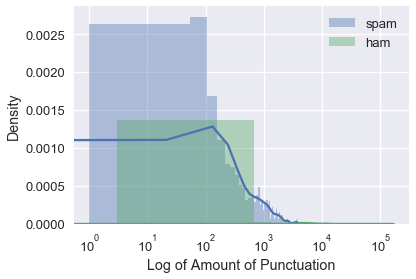

In [452]:

train_spam_punct= (train.loc[train.spam == 1]).reset_index()
train_non_spam_punct = (train.loc[train.spam == 0]).reset_index()
plot= sns.distplot(train_spam_punct['punct'], bins=250, label='spam')
plot= sns.distplot(train_non_spam_punct['punct'],bins=250, label='ham')
plot.set_xscale('log')

# plot= sns.distplot(number_of_punct, bins=650, label='spam')
#plot.set_yscale('log')

#plt.xlim(0,20000)
plt.legend()
plot.set_xlabel('Log of Amount of Punctuation')
plot.set_ylabel('Density')


In [453]:
#model for punctuation
# log_reg_mod= linear_model.LogisticRegression(fit_intercept= False)
# model= log_reg_mod.fit(X_train, y_train).coef_
# log_reg_mod.score(X_train, y_train)

In [454]:
reshaped_upper= np.reshape(train_upper.upper, (8348, 1))
reshaped_upper

/Users/devyndonahue/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[ 22],
       [ 18],
       [ 51],
       ..., 
       [203],
       [371],
       [ 37]])

In [455]:
upper_feature= np.concatenate((X_train, reshaped_upper), axis=1)

In [456]:
# log_reg_mod= linear_model.LogisticRegression(fit_intercept= False)
# model= log_reg_mod.fit(X_train, y_train).coef_
# log_reg_mod.score(X_train, y_train)

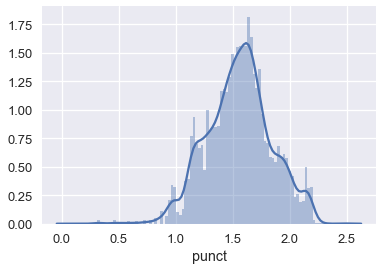

In [457]:
#plot punctuation
cols= train['punct']
columns= cols[cols>0]
xs= np.log(cols)
coll= xs[xs>0]
plot=sns.distplot(np.log(coll), bins=100)

/Users/devyndonahue/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


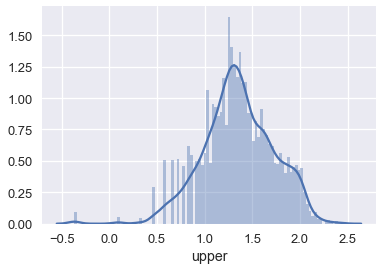

In [458]:
#plot uppercase
col= train_upper['upper']
column= col[col>0]
x= np.log(col)
y= x[x>0]
plot=sns.distplot(np.log(y), bins=100)

In [459]:
number_of_character_all= []
for i in range(len(train.email)):
    number_of_character_all+= [len(train.email[i])]

In [460]:
train['characters']= number_of_character_all

In [461]:
reshaped_characters= np.reshape(train.characters, (8348, 1))
reshaped_characters

/Users/devyndonahue/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[ 359],
       [ 278],
       [ 444],
       ..., 
       [ 881],
       [2723],
       [ 863]])

In [462]:
characters_feature= np.concatenate((X_train, reshaped_characters), axis=1)

In [463]:
#model for characters
# log_reg_mod= linear_model.LogisticRegression(fit_intercept= False)
# model= log_reg_mod.fit(X_train, y_train).coef_
# log_reg_mod.score(X_train, y_train)

In [464]:
def unique_words(dfs):
    dicty = {}
    for i in range(len(dfs)):
        words= np.unique(dfs.iloc[i].split())
        for w in words:
            if w in dicty:
                dicty[w] += 1
            else:
                dicty[w] = 1
    return dicty

num_words_used = unique_words(train.email)
words= list(num_words_used.keys())
counts= [num_words_used[k] for k in words]
word_counts = pd.DataFrame({'word': words, 'word_count': counts})


#reshaped_word= np.reshape(word_counts.word_count, (202370, 1))
print(len(word_counts))
word_counts.head()

202370


,word,word_count
0,true.,69
1,>textpad,2
2,http://scriptingnews.userland.com/backissues/2...,2
3,code=2e,7
4,[0]torgox,1


In [465]:
top_words= word_counts.sort_values(['word_count'], ascending= False).head(20)
top_words

,word,word_count
85008,the,7226
146272,to,7091
171518,a,6609
1959,and,6438
17126,of,6206
154692,is,5848
9036,for,5721
168504,in,5707
113462,this,5144
164355,on,5133


In [466]:
spam_and_ham= words_in_texts(top_words['word'], train['email'])
spam_and_ham

array([[1, 1, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 0]])

In this graph, I looked how often the top 20 most common words appear in the emails, evaluating spam and ham emails separately. The average percentage is fairly similar, but it does show that the top 20 most occurring words are more often in spam emails than they are in ham emails.

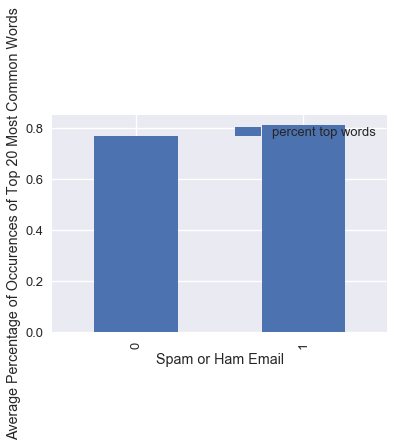

In [467]:
plot3= grouped_train.plot(kind='bar')
plot3.set_xlabel('Spam or Ham Email')
plot3.set_ylabel('Average Percentage of Occurences of Top 20 Most Common Words')
word_string= "In this graph, I looked how often the top 20 most common words appear in the emails, evaluating spam and ham emails separately. The average percentage is fairly similar, but it does show that the top 20 most occurring words are more often in spam emails than they are in ham emails."
display(Markdown(word_string))

In [468]:
# words= pd.DataFrame(spam_and_ham, columns=[top_words['word']])
# zeros_and_ones= words.apply(pd.Series.value_counts, axis=1).fillna(0)
# percent_zeros= zeros_and_ones[0]/20
# words['percent spam words']= percent_zeros

In [469]:
#word_feature= np.concatenate((X_train, reshaped_word), axis=1)

In [470]:
#model for words
# log_reg_mod= linear_model.LogisticRegression(fit_intercept= False)
# model= log_reg_mod.fit(X_train, y_train).coef_
# log_reg_mod.score(X_train, y_train)

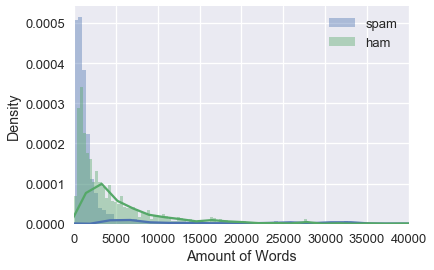

In [471]:
train_spam= (train.loc[train.spam == 1]).reset_index()
number_of_characters_spam = []
for i in range(len(train_spam)):
    number_of_characters_spam= number_of_characters_spam + [len(train_spam.email[i])]

#
train_non_spam = (train.loc[train.spam == 0]).reset_index()
number_of_characters = []
for i in range(len(train_non_spam)):
    number_of_characters = number_of_characters + [len(train_non_spam.email[i])]
plot= sns.distplot(number_of_characters, bins=650, label='spam')

#plot.set_xscale('log')
#number of words
plt.xlim(0,40000)
average_length_char_non_spam = np.sum(number_of_characters)/ len(train_spam)
average_length_char_non_spam
# col3= number_of_characters
# column2= col3[col3>0]
# x3= np.log(cols)
# y3= x3[x3>0]
# plot=sns.distplot(np.log(y3), bins=100)
plot= sns.distplot(number_of_characters_spam, bins= 650, label= 'ham')
plt.xlim(0, 40000)
average_length_char_spam = np.sum(number_of_characters_spam) / len(train_spam)
average_length_char_spam
plt.legend()
plot.set_xlabel('Amount of Words')
plot.set_ylabel('Density')

In [472]:
#95% CI number of spam characters
mean_spam= np.mean(number_of_characters_spam)
standard_error_spam = np.std(number_of_characters_spam) / np.sqrt(len(number_of_characters_spam))
ci_upper= mean_spam + 1.645 *standard_error_spam
ci_lower= mean_spam - 1.645 *standard_error_spam
ci_spam = (ci_lower, ci_upper)
ci_spam

(5016.7683609705573, 5881.7456577210314)

In [473]:
mean_non_spam= np.mean(number_of_characters)
standard_error = np.std(number_of_characters) / np.sqrt(len(number_of_characters))
ci_upper2= mean_non_spam + 1.645 *standard_error
ci_lower2= mean_non_spam - 1.645 *standard_error
ci_nonspam = (ci_lower2, ci_upper2)
ci_nonspam

(2778.3620280074138, 3146.9401627142361)

In [474]:
spam_words= ['free access', 'free grant money', 'free hosting', 'free investment'
             , 'free leads', 'free money', 'free quote', 'free sample', 'full refund',
            'get paid', 'lowest price', 'we hate spam', "this isn't spam", 'unlimited',
            'winner', 'for free', 'billion dollars', 'as seen on', 'bank',
            'credit', 'click here', 'dig up dirt', 'not a scam', 'limited time',
            'satisfaction guaranteed', 'fast cash', 'click here', 'additional income',
            'guaranteed', 'join', 'opportunity', 'work at home', 'no fees', 'earn extra',
            'click to remove', '#1', '100% free', 'thousands', 'americans', 'f r e e', 
            'fantastic deal', "it's effective", 'congratulations', 'act now', 'order now',
            'time limited', 'limited', 'bonus', 'maximize']

In [476]:
spam_feature = words_in_texts(spam_words, train['email'])


In [477]:
X_train_new=np.hstack([X_train, punct_feature, upper_feature, characters_feature, spam_feature])
len(X_train_new)

8348

In [478]:
import sklearn
log_reg_mod2= linear_model.LogisticRegressionCV(fit_intercept=False)
clf2= log_reg_mod2.fit(X_train_new, y_train)
score= clf2.score(X_train_new, y_train)
score

0.8667944417824629

In [479]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_traincounts = vectorizer.fit_transform(train.email)
X_traincounts.shape

(8348, 118252)

In [480]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer().fit(X_traincounts)
X_train_tf = transformer.transform(X_traincounts)
X_train_tf.shape

(8348, 118252)

In [481]:
clf_tf = LogisticRegression().fit(X_train_tf, y_train)
clf_tf.score(X_train_tf, y_train)

0.9885002395783421

In [482]:
from sklearn.pipeline import Pipeline
text_clf= Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()
                                                 ), ('clf', LogisticRegression())])
text_clf.fit(train.email, train.spam)
test_predictions = text_clf.predict(test.email)
test_predictions

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1,

### Feature/Model Selection Process

In this following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

1. *I originally tried with the suggested features to try and test accuracy, but none were giving the clf that was required. Once I did the bag of words feature, I reached a high clf and knew that was the best way to do it from all the techniques I tried. There was a lot of trial and error to be able to discover what was the best feature to use.*
1. *What I found to work best was implementing the td-idf feature because it increased accuracy by a significant amount. Originally I was doing bag of words but was not doing td-idf which as a result, I was looking at total number of occurences of words which wasn't what I wanted. Originally, I thought adding spam words to the model would be enough to reach an 88% clf. This may have worked if I kept adding appropriate spam words, but there would have been a lot of overfitting if this was the only technique I used.*
1. *What surprised me was the amount of accuracy it increased by using the td-idf feature. Before, just implementing the spam words brought it up but did not even reach the required 88%, but once I used the bag of words feature, it brought it up over 20% from the original X_train.*

### EDA

In the four light blue cells below, show us four different visualizations that you used to select features for your model. Each cell should output:

1. A plot showing something meaningful about the data that helped you during feature / model selection.
2. 2-3 sentences describing what you plotted and what its implications are for your features.

Feel to create as many plots as you want in your process of feature selection, but select four interesting ones for the cells below.

You should not show us more than one visualization for the same type of feature. For example, don't show us a bar chart of the number of emails that contain the word "hello" and a bar chart of the number of emails that contain the word "world". Each visualization should be conceptually distinct.

In this visualization I separated the Upper Case Letters into two graphs, spam and ham. This way we can compare the loglog of the count of upper case letters in spam emails vs. the loglog of the count of upper case letters in ham emails. The results from the data that was given showed that ham emails tend to have less uppercase letters than spam emails do. The spam graph is skewed left and the ham graph is more of a bimodal distribution, with a peak around 1.25 and another around 2.0, with a very sight skew to the left.

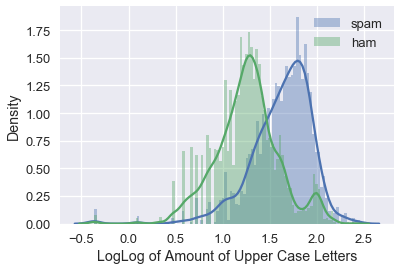

In [483]:
# This is the first graded EDA cell
#count the number of uppercase letters in the emails and create an uppercase column
import re
upper= []
for i in train_upper['email']:
    upper+= [len(re.findall(r'[A-Z]', i))]
train_upper['upper']= upper
#separate spam from not spam
train_spam_upper= (train_upper.loc[train_upper.spam == 1]).reset_index()
train_non_spam_upper = (train_upper.loc[train_upper.spam == 0]).reset_index()


#graph the spam and nonspam 
col= train_spam_upper['upper']
column= col[col>0]
x= np.log(column)
col1= x[x>0]
plot=sns.distplot(np.log(col1), bins=100, label= 'spam')

col3= train_non_spam_upper['upper']
columns3= col3[col3>0]
x3 = np.log(columns3)
coll3= x3[x3>0]
plot=sns.distplot(np.log(coll3), bins=100, label= 'ham')

plt.legend()
plot.set_xlabel('LogLog of Amount of Upper Case Letters')
plot.set_ylabel('Density')


string= "In this visualization I separated the Upper Case Letters into two graphs, spam and ham. This way we can compare the loglog of the count of upper case letters in spam emails vs. the loglog of the count of upper case letters in ham emails. The results from the data that was given showed that ham emails tend to have less uppercase letters than spam emails do. The spam graph is skewed left and the ham graph is more of a bimodal distribution, with a peak around 1.25 and another around 2.0, with a very sight skew to the left."
display(Markdown(string))

In this graph I separated the punctuation into two graphs, spam and ham. This way we can compare the loglog of the count of punctuation in spam emails vs. the loglog of the count of punctuation in ham emails. The results from the data that was given showed that ham emails tend to have less punctuation than spam emails do. Both the graphs have similar shape, and are both slightly skewed left.

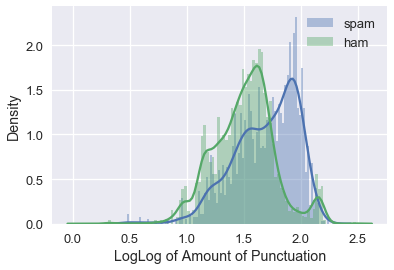

In [484]:
# This is the second graded EDA cell
import re
#count the number of punctuations in each email
punct_re= r'["#$%&\'()*+,-.\/:;<=>?@\[\\\]^_`{|}~!]'
count=[]
for i in train['email']:
    count+= [len(re.findall(punct_re, i))]
train['punct']= count
#separate into spam and ham
train_spam_punct= (train.loc[train.spam == 1]).reset_index()
train_non_spam_punct = (train.loc[train.spam == 0]).reset_index()

#graph spam and ham punctuation
cols= train_spam_punct['punct']
columns= cols[cols>0]
xs= np.log(columns)
coll= xs[xs>0]
plot1=sns.distplot(np.log(coll), bins=100, label= 'spam')

cols2= train_non_spam_punct['punct']
columns2= cols2[cols2>0]
x2= np.log(columns2)
coll2= x2[x2>0]
plot1=sns.distplot(np.log(coll2), bins=100, label= 'ham')

plt.legend()
plot1.set_xlabel('LogLog of Amount of Punctuation')
plot1.set_ylabel('Density')

second_string= "In this graph I separated the punctuation into two graphs, spam and ham. This way we can compare the loglog of the count of punctuation in spam emails vs. the loglog of the count of punctuation in ham emails. The results from the data that was given showed that ham emails tend to have less punctuation than spam emails do. Both the graphs have similar shape, and are both slightly skewed left."
display(Markdown(second_string))

95% Confidence Interval of Count of Characters in Spam emails
(4933.9513857497668, 5964.5626329418219)
95% Confidence Interval of Count of Characters in Non-Spam emails
(2778.3620280074138, 3146.9401627142361)


For this feature, I separated the spam characters and the ham characters to create a graph comparing the two. The graphs look fairly similar in shape, but spam having more emails with less characters. The range of both spam and ham are roughly the same, and both are skewed right.

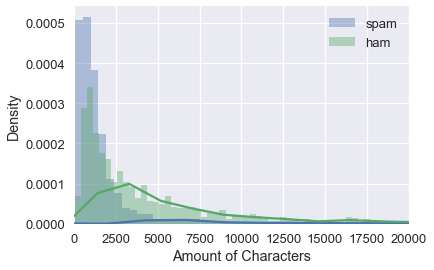

In [485]:
# This is the third graded EDA cell
#count the number of characters in each email
number_of_character_all= []
for i in range(len(train.email)):
    number_of_character_all+= [len(train.email[i])]
    
train['characters']= number_of_character_all
#count the number of characters in spam emails
train_spam= (train.loc[train.spam == 1]).reset_index()
number_of_characters_spam = []
for i in range(len(train_spam)):
    number_of_characters_spam= number_of_characters_spam + [len(train_spam.email[i])]

#count the number of characters in non spam emails
train_non_spam = (train.loc[train.spam == 0]).reset_index()
number_of_characters = []
for i in range(len(train_non_spam)):
    number_of_characters = number_of_characters + [len(train_non_spam.email[i])]
plot2= sns.distplot(number_of_characters, bins=650, label='spam')

plt.xlim(0,20000)
plot2= sns.distplot(number_of_characters_spam, bins= 650, label= 'ham')
plt.legend()
plot2.set_xlabel('Amount of Characters')
plot2.set_ylabel('Density')
#find confidence interval of spam characters
mean_spam= np.mean(number_of_characters_spam)
standard_error_spam = np.std(number_of_characters_spam) / np.sqrt(len(number_of_characters_spam))
ci_upper= mean_spam + 1.96 *standard_error_spam
ci_lower= mean_spam - 1.96 *standard_error_spam
ci_spam = (ci_lower, ci_upper)
print("95% Confidence Interval of Count of Characters in Spam emails")
print(ci_spam)
#find confidence interval of non spam characters
mean_non_spam= np.mean(number_of_characters)
standard_error = np.std(number_of_characters) / np.sqrt(len(number_of_characters))
ci_upper2= mean_non_spam + 1.645 *standard_error
ci_lower2= mean_non_spam - 1.645 *standard_error
ci_nonspam = (ci_lower2, ci_upper2)
print("95% Confidence Interval of Count of Characters in Non-Spam emails")
print(ci_nonspam)

character_string= 'For this feature, I separated the spam characters and the ham characters to create a graph comparing the two. The graphs look fairly similar in shape, but spam having more emails with less characters. The range of both spam and ham are roughly the same, and both are skewed right.'
display(Markdown(character_string))

Average percent of top 20 words occurring in ham: 0.769813
Average percent of top 20 words occurring in spam: 0.811893


This graph shows that there were times when all 20 words occurred in both spam and ham emails, but all 20 appeared in spam emails more often than in ham. The highest percentages of word occurences were more often in spam emails, but as the percentages decreased from about 85%, the ham emails generally had slightly more occurences of those percentages than the spam emails did. This distribution is heavily skewed left. The average percent of the times the top 20 words occured is higher in spam emails than in ham emails.

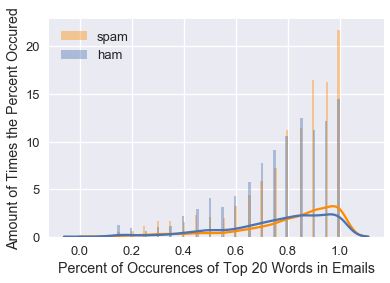

In [486]:
# This is the fourth graded EDA cell
#select the different words from all of the emails
def unique_words(dfs):
    dicty = {}
    for i in range(len(dfs)):
        words= np.unique(dfs.iloc[i].split())
        for w in words:
            if w in dicty:
                dicty[w] += 1
            else:
                dicty[w] = 1
    return dicty
#count the number of appearances of each word and create a dataframe
num_words_used = unique_words(train.email)
words= list(num_words_used.keys())
counts= [num_words_used[k] for k in words]
word_counts = pd.DataFrame({'word': words, 'word_count': counts})

#I sorted the count of the words in ascending order and selected the top 1000
top_words= word_counts.sort_values(['word_count'], ascending= False).head(20)

#find if the top words are in the emails
spam_and_ham= words_in_texts(top_words['word'], train['email'])

#count the number of top words that are in and arent in the emails
words= pd.DataFrame(spam_and_ham, columns=[top_words['word']])
zeros_and_ones= words.apply(pd.Series.value_counts, axis=1).fillna(0)

#calculate percentage of the words that appear in the emails
percent_ones= zeros_and_ones[1]/20
train['percent top words']= percent_ones
train2= train[['spam', 'percent top words']]

#group by spam and ham emails and take the average percent
train_spam_words= (train.loc[train.spam == 1]).reset_index()
train_non_spam_words = (train.loc[train.spam == 0]).reset_index()
percent_ones= zeros_and_ones[1]/20
train['percent top words']= percent_ones
train2= train[['spam', 'percent top words']]
grouped_train= train2.groupby(['spam']).mean()

column_want= train_spam_words['percent top words']
plot5= sns.distplot((column_want), bins=100, label= 'spam', color='darkorange')

column_want_ham= train_non_spam_words['percent top words']
plot5= sns.distplot((column_want_ham), bins=100, label= 'ham')
plt.legend()
plot5.set_xlabel('Percent of Occurences of Top 20 Words in Emails')
plot5.set_ylabel('Amount of Times the Percent Occured')
print('Average percent of top 20 words occurring in ham:', 0.769813)
print('Average percent of top 20 words occurring in spam:', 0.811893)
word_string= "This graph shows that there were times when all 20 words occurred in both spam and ham emails, but all 20 appeared in spam emails more often than in ham. The highest percentages of word occurences were more often in spam emails, but as the percentages decreased from about 85%, the ham emails generally had slightly more occurences of those percentages than the spam emails did. This distribution is heavily skewed left. The average percent of the times the top 20 words occured is higher in spam emails than in ham emails."
display(Markdown(word_string))


### Making an ROC Curve

It turns out that there's a tradeoff between sensitivity and specificity. In most cases we won't be able to get perfect sensitivity and specificity, so we have to select which of two we value more. For example, in the case of cancer screenings we value specificity more because false negatives are comparatively worse than false positives — a false negative means that a patient might not discover a disease until it's too late to treat, while a false positive means that a patient will probably have to take another screening.

Recall that logistic regression calculates the probability that an example belongs to a certain class. Then, to classify an example we say that an email is spam if our classifier gives it >=0.5 probability of being spam. However, we can adjust that cutoff: we can say that an email is spam only if our classifier gives it >=0.7 probability of being spam, for example. This is how we can trade off sensitivity and specificity.

The ROC (receiver operating charactistic) curve shows this trade off for each possible cutoff probability. We will discuss this during lecture, and you can also read [this blog post for more information.](https://www.theanalysisfactor.com/what-is-an-roc-curve/).

In the light blue cell below, plot the ROC curve for your final classifier (the one you use to make predictions for Kaggle).

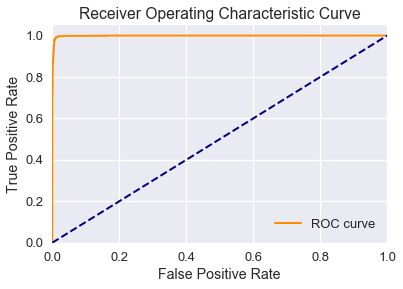

In [487]:
probabilities= pd.DataFrame(text_clf.predict_proba(train.email))
from sklearn.metrics import roc_curve
curve= roc_curve(y_train, probabilities[1])
plt.figure()
lw= 2
plt.plot(curve[0], curve[1], color='darkorange', lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc= 'lower right')
plt.show()

# Note that you'll want to use the .predict_proba(...) method for your classifier
# instead of .predict(...) so you get probabilities, not classes

### Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

The code below assumes that you've saved your predictions in a 1-dimensional array called `test_predictions`.

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/433a6bca95f94a78a0d2a6e7e8b311c3

In [156]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.
assert isinstance(test_predictions, np.ndarray)
assert test_predictions.shape == (1000, )

submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])

timestamp = datetime.isoformat(datetime.now()).split(".")[0]

submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)
print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2017-12-05T19:03:04.csv.
You may now upload this CSV file to Kaggle for scoring.


## Submission

Run the cell below to submit your notebook to OkPy:

In [488]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2.ipynb'.
Submit... 100% complete
Submission successful for user: devyndonahue@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/proj2/submissions/Y6Mwj9



Now, run this cell to create a PDF to upload to Gradescope.

In [489]:
!pip install -U gs100
from gs100 import convert
# Change the zoom argument if your font size is too small
convert('proj2.ipynb', num_questions=8, zoom=1)

Requirement already up-to-date: nbconvert>=5 in /Users/devyndonahue/anaconda3/lib/python3.5/site-packages (from gs100)
Requirement already up-to-date: nbformat>=4 in /Users/devyndonahue/anaconda3/lib/python3.5/site-packages (from gs100)
Requirement already up-to-date: beautifulsoup4>=4 in /Users/devyndonahue/anaconda3/lib/python3.5/site-packages (from gs100)
Requirement already up-to-date: pdfkit>=0.6 in /Users/devyndonahue/anaconda3/lib/python3.5/site-packages (from gs100)
Requirement already up-to-date: toolz>=0.8 in /Users/devyndonahue/anaconda3/lib/python3.5/site-packages (from gs100)
Requirement already up-to-date: PyPDF2>=1.26 in /Users/devyndonahue/anaconda3/lib/python3.5/site-packages (from gs100)
    100% |████████████████████████████████| 133kB 1.3MB/s ta 0:00:01
Requirement already up-to-date: pygments in /Users/devyndonahue/anaconda3/lib/python3.5/site-packages (from nbconvert>=5->gs100)
Requirement already up-to-date: traitlets>=4.2 in /Users/devyndonahue/anaconda3/lib/pyt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2.ipynb'.
Created question_pdfs/q_email.pdf
Created question_pdfs/q01.pdf
Created question_pdfs/q06.pdf
Created question_pdfs/q_feature.pdf
Created question_pdfs/q_eda1.pdf
Created question_pdfs/q_eda2.pdf
Created question_pdfs/q_eda3.pdf
Created question_pdfs/q_eda4.pdf
Created question_pdfs/q_roc.pdf


If the font size of your PDF is too small/large, change the value of the zoom argument when calling convert. For example, setting zoom=2 makes everything twice as big.


Make sure to upload your PDF now. Otherwise, your written questions won't be graded.